# The Lorenz Differential Equations

Before we start, we import some preliminary libraries. We will also import (below) the accompanying `lorenz.py` file, which contains the actual solver and plotting routine.

In [1]:
import csv
from csv import DictReader
from collections import defaultdict
reader = DictReader(open('prebivalstvo-SLO.csv', 'rt', encoding='utf-8'))




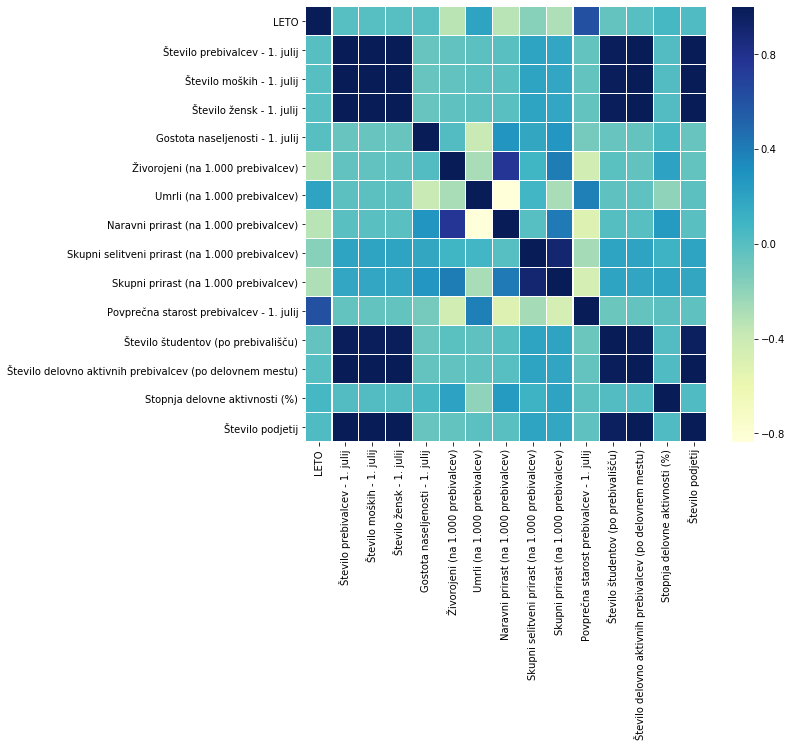

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from csv import DictReader
from scipy.stats import norm


data = pd.read_csv("vse.csv")

corrmat = data.corr()

f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

In [ ]:
***Za dobit imena stolpcev in določanje katere hočem(stolpci2)

In [2]:
with open('prebivalstvo-SLO.csv', 'rt', encoding='utf-8') as f:
    d_reader = csv.DictReader(f)
    headers = d_reader.fieldnames

In [3]:
stolpci = []
for a in headers:
    if "Total increase" in a:
        stolpci.append(a)

In [17]:
stolpci2 = []
stolpci3 = []
for a in stolpci:
    if "Total increase per "not in a:
        leto = a.split()
        if 2018>float(leto[0]) >2007: 
            stolpci2.append(a)
    else:
        leto = a.split()
        if 2018>float(leto[0]) >2007: 
            stolpci3.append(a)

In [5]:
stolpci2

['2008 Total increase',
 '2009 Total increase',
 '2010 Total increase',
 '2011 Total increase',
 '2012 Total increase',
 '2013 Total increase',
 '2014 Total increase',
 '2015 Total increase',
 '2016 Total increase',
 '2017 Total increase']

In [6]:
stolpci3

['2008 Total increase per 1000 population',
 '2009 Total increase per 1000 population',
 '2010 Total increase per 1000 population',
 '2011 Total increase per 1000 population',
 '2012 Total increase per 1000 population',
 '2013 Total increase per 1000 population',
 '2014 Total increase per 1000 population',
 '2015 Total increase per 1000 population',
 '2016 Total increase per 1000 population',
 '2017 Total increase per 1000 population']

In [9]:
***Risanje drevesa(podatki so letni priraski(direktne številjke ljudi), od leta 1995 do 2018)

SyntaxError: invalid syntax (<ipython-input-9-6fd2e6dd92fd>, line 1)

In [21]:
vsi=[]
vsi2=[]
li=[]
li2=[]
obcine=[]
slovar ={}
reader = DictReader(open('prebivalstvo-SLO.csv', 'rt', encoding='utf-8'))
for row in reader:
    li=[]
    li2=[]
    obcina=row["MUNICIPALITIES"]
    obcine.append(obcina)
    if obcina!="SLOVENIA":
        for a in stolpci2:
            if (row[a]=="-"):
                li.append(0)
            else:
                li.append(row[a])
        vsi.append(li)
        
        for a in stolpci3:
            if (row[a]=="-"):
                li2.append(0)
            else:
                li2.append(row[a])
        vsi2.append(li2)
    


In [23]:
import scipy.cluster.hierarchy as sch
Ll = sch.linkage(vsi, method="average", metric="jaccard")
Lll = sch.linkage(vsi, method="average", metric="euclidean")

In [ ]:
import scipy.cluster.hierarchy as sch
Ll2 = sch.linkage(vsi2, method="average", metric="jaccard")
Lll2 = sch.linkage(vsi2, method="average", metric="euclidean")

In [ ]:
***Drevo z direktnimi podatki rastii/upada (ni na 1000 prebivalstva), prevaga Ljubljana, ker pač več ljudi 
(leta 2008 do 2018, daj isto kot naslednji)

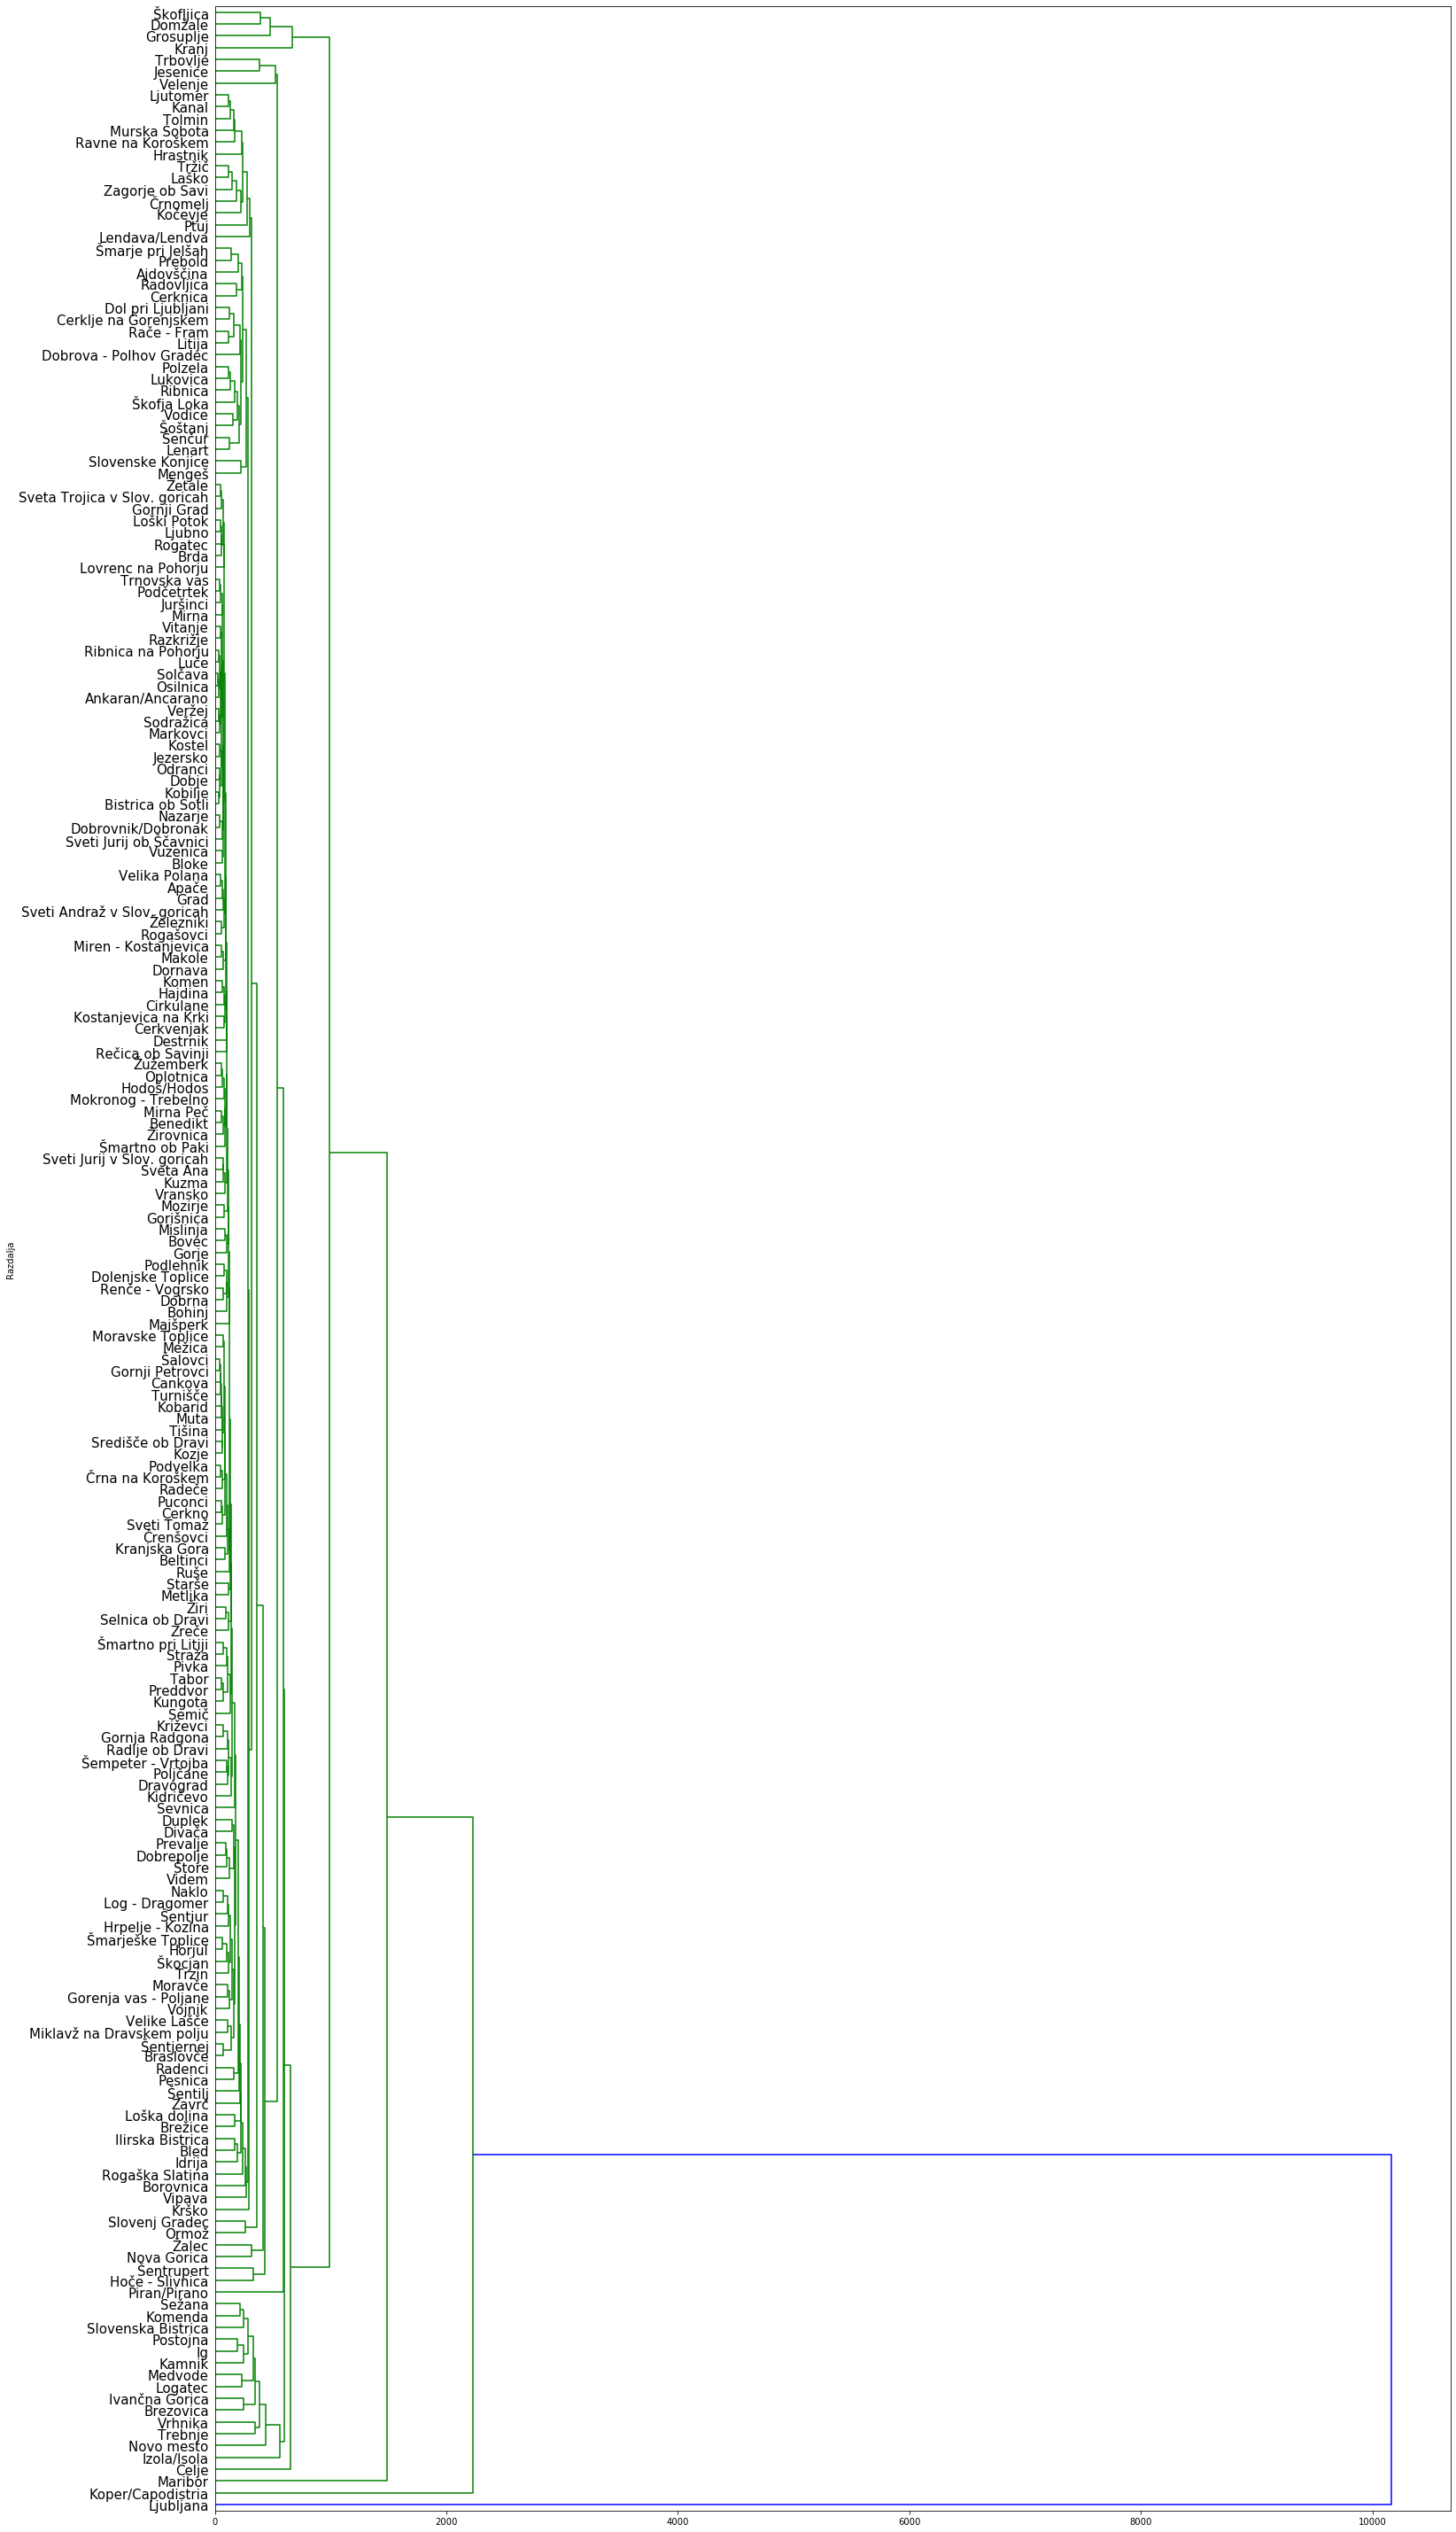

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 52))
D  = sch.dendrogram(Lll,labels=obcine,orientation="right", leaf_font_size=15)

plt.ylabel("Razdalja")
plt.show()

In [ ]:
***Prikaz rasti na 1000 prebivalstva (samo leta 2008 do 2018)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 56))
D  = sch.dendrogram(Lll2,labels=obcine,orientation="right", leaf_font_size=15)

plt.ylabel("Razdalja")
plt.show()

In [ ]:
reader = DictReader(open('prebivalstvo-SLO.csv', 'rt', encoding='utf-8'))
for row in reader:
    obcina=row["MUNICIPALITIES"]
  
    if obcina=="Šentrupert":
        for a in stolpci3:
            print(row[a])


In [ ]:
***Porazdelitve rasti, pri vseh se gleda samo občine in ne skupno Slovenije("obcina!="SLOVENIA"").

In [11]:

import csv
from csv import DictReader
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

lis=[]
lis2=[]
lis3=[]

reader = DictReader(open('prebivalstvo-SLO.csv', 'rt', encoding='utf-8'))
for row in reader:
    obcina=row["MUNICIPALITIES"]
    leto=row["2018 Total increase"]
    leto2=row["2007 Total increase per 1000 population"]
    leto3=row["2008 Total increase per 1000 population"]
    
    if obcina!="SLOVENIA":
        lis.append(float(leto))
        if leto2=="-":
            lis2.append(float(0))
        else:
            lis2.append(float(leto2))
        if leto3=="-":
            lis3.append(float(0))
        else:
            lis3.append(float(leto3))
lis.sort()
lis2.sort()
lis3.sort()



In [ ]:
***Direktne številke rasti za leto 2018, čist desno je Ljubljana(veliko ljudi)

In [ ]:
plt.figure(figsize=(30,25));
plt.hist(lis,bins=30)
plt.xlabel("Sprememba",fontsize=60)
plt.ylabel("Število občin",fontsize=60)

In [ ]:
***Podatki za rast leta 2007 na 1000 prebivalstva

In [ ]:
plt.figure(figsize=(15,10));
plt.hist(lis2,bins=30)
plt.xlabel("Sprememba na 1000 prebivalstva",fontsize=30)
plt.ylabel("Število občin",fontsize=30)

In [ ]:
***Primerjava rasti leta 2007 in 2008 na 1000 prebivasltva(podatki za 2007 so isti, kot zgornji graf). 

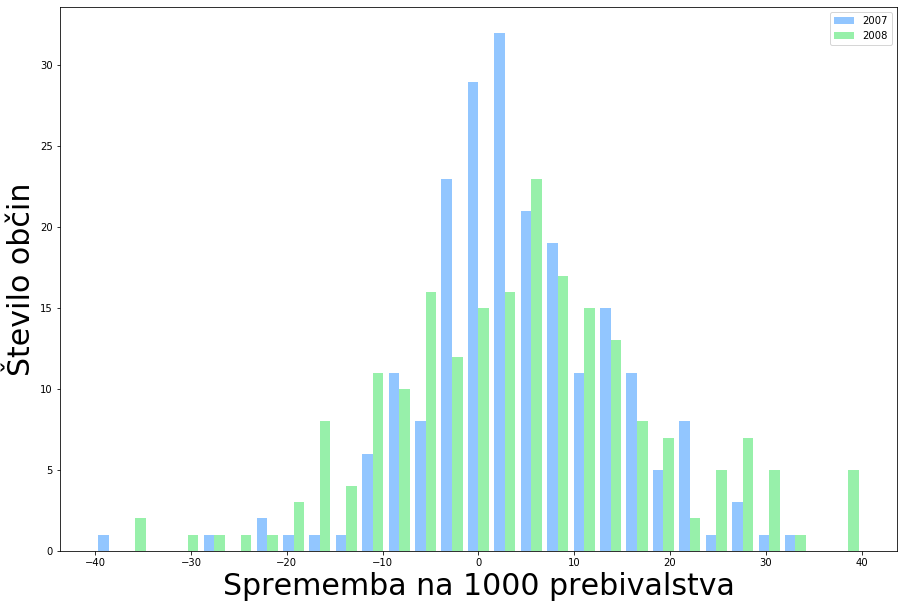

In [12]:
import random
import numpy
from matplotlib import pyplot
plt.style.use('seaborn-pastel')


bins = np.linspace(-40, 40, 30)
plt.figure(figsize=(15,10));
plt.hist([lis2, lis3], bins, label=['2007', '2008'])
plt.legend(loc='upper right')
plt.xlabel("Sprememba na 1000 prebivalstva",fontsize=30)
plt.ylabel("Število občin",fontsize=30)
plt.show()

In [ ]:
lis

In [ ]:
*** Skor isto, kot zgoraj sam za druga leta stolpci(leto 2008 do 2018, ker ni podatkov za vsa leta)

In [9]:
with open('prebivalstvo-SLO.csv', 'rt', encoding='utf-8') as f:
    d_reader = csv.DictReader(f)
    headers = d_reader.fieldnames
    


In [10]:
stolpci = []
for a in headers:
    if "Total increase" in a:
        stolpci.append(a)

In [11]:
stolpci2 = []
stolpci3 = []
for a in stolpci:
    if "Total increase per "not in a:
        leto = a.split()
        if 2018>float(leto[0]) >2007: 
            stolpci2.append(a)
            stolpci3.append(leto[0])

In [12]:
stolpci2

['2008 Total increase',
 '2009 Total increase',
 '2010 Total increase',
 '2011 Total increase',
 '2012 Total increase',
 '2013 Total increase',
 '2014 Total increase',
 '2015 Total increase',
 '2016 Total increase',
 '2017 Total increase']

In [ ]:
***Iskanje občine z največjo rastjo in upadom leta 2018, na 1000 prebivalstva

In [13]:
slovar=defaultdict(float)
reader = DictReader(open('prebivalstvo-SLO.csv', 'rt', encoding='utf-8'))
for row in reader:
    obcina=row["MUNICIPALITIES"]
    vv=row["2017 Total increase per 1000 population"]
    if obcina!="SLOVENIA":
        slovar[obcina]=(float(vv))
      
max(slovar.values()),min(slovar.values())

(21.4, -27.7)

In [14]:
for a,b in slovar.items():
    if b==max(slovar.values()):
        print("max: ",a)
    if b==min(slovar.values()):
        print("min: ",a)

max:  Divača
min:  Zavrč


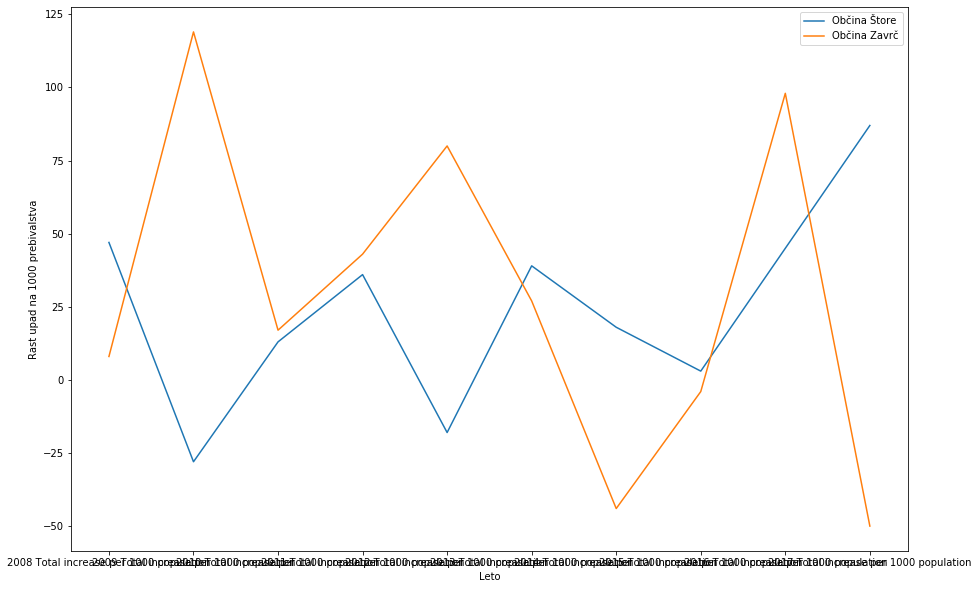

In [25]:
li=[]
vsi=[]
vsi2=[]

reader = DictReader(open('prebivalstvo-SLO.csv', 'rt', encoding='utf-8'))
for row in reader:
    li=[]
    obcina=row["MUNICIPALITIES"]
    obcine.append(obcina)
    if obcina =="Divača" :
        for a in stolpci2:
            if (row[a]=="-"):
                vsi.append(float(0))
            else:
                vsi.append(float(row[a]))
    if obcina =="Zavrč":
        for a in stolpci2:
            if (row[a]=="-"):
                vsi2.append(float(0))
            else:
                vsi2.append(float(row[a]))
plt.figure(figsize=(15,10));
plt.plot(stolpci3,vsi,label="Občina Štore")
plt.plot(stolpci3,vsi2,label="Občina Zavrč")
plt.xlabel("Leto")
plt.ylabel("Rast upad na 1000 prebivalstva")
plt.legend()
plt.show()
    


In [27]:
slovar=defaultdict(float)
reader = DictReader(open('prebivalstvo-SLO.csv', 'rt', encoding='utf-8'))
for row in reader:
    obcina=row["MUNICIPALITIES"]
    vv=row["2017 Net migration between municipalities"]
    if obcina!="SLOVENIA":
        slovar[obcina]=(float(vv))
      
max(slovar.values()),min(slovar.values())


(252.0, -286.0)

In [28]:
for a,b in slovar.items():
    if b==max(slovar.values()):
        print("max: ",a)
    if b==min(slovar.values()):
        print("min: ",a)

max:  Koper/Capodistria
min:  Kranj


In [29]:
stolpci2 = []
leta=[]
for a in headers:
    if "Net migration between municipalities" in a and "2018" not in a and a[0]=="2":
        stolpci2.append(a)
        x = a.split()
        leta.append(x[0])

In [ ]:
stolpci2

In [ ]:
leta

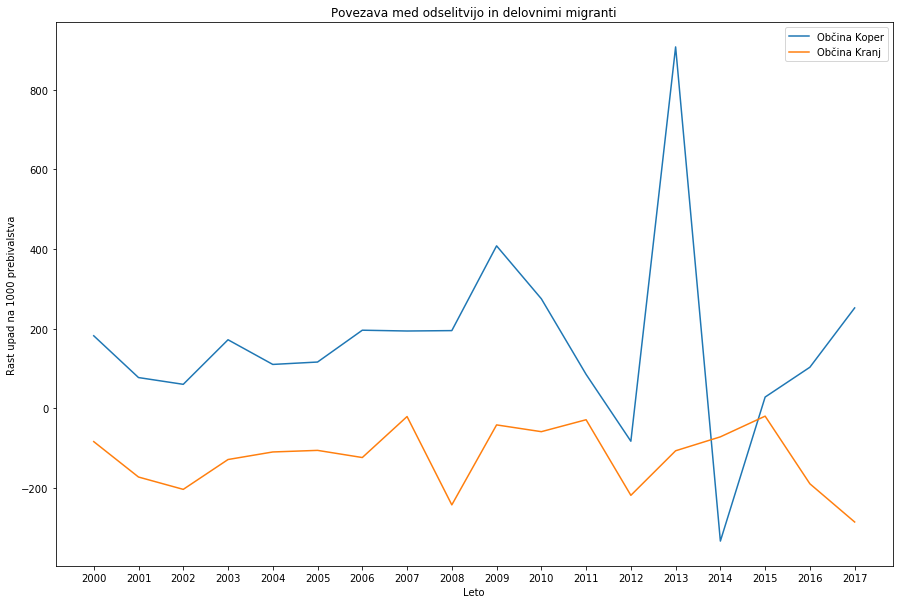

In [33]:
li=[]
vsi=[]
vsi2=[]

reader = DictReader(open('prebivalstvo-SLO.csv', 'rt', encoding='utf-8'))
for row in reader:
    li=[]
    obcina=row["MUNICIPALITIES"]
    obcine.append(obcina)
    if obcina =="Koper/Capodistria" :
        for a in stolpci2:
            if (row[a]=="-"):
                vsi.append(float(0))
            else:
                vsi.append(float(row[a]))
    if obcina =="Kranj":
        for a in stolpci2:
            if (row[a]=="-"):
                vsi2.append(float(0))
            else:
                vsi2.append(float(row[a]))
                
plt.figure(figsize=(15,10));
plt.plot(leta,vsi,label="Občina Koper")
plt.plot(leta,vsi2,label="Občina Kranj")
plt.xlabel("Leto")
plt.ylabel("Rast upad na 1000 prebivalstva")
plt.legend()
plt.title("Povezava med odselitvijo in delovnimi migranti")
plt.show()
    


In [35]:
stolpci2 = []
stolpci3 = []
for a in stolpci:
    if "Total increase per "not in a:
        leto = a.split()
        if 2018>float(leto[0]) >2007: 
            stolpci2.append(a)
            stolpci3.append(leto[0])

In [36]:
slovar=defaultdict(float)
reader = DictReader(open('prebivalstvo-SLO.csv', 'rt', encoding='utf-8'))
for row in reader:
    obcina=row["MUNICIPALITIES"]
    vv=row["2017 Net migration from abroad"]
    if obcina!="SLOVENIA":
        slovar[obcina]=(float(vv))
      
max(slovar.values()),min(slovar.values())

for a,b in slovar.items():
    if b==max(slovar.values()):
        print("max: ",a)
    if b==min(slovar.values()):
        print("min: ",a)
        
stolpci2 = []
leta=[]
for a in headers:
    if "migration from abroad" in a and "2018" not in a and a[0]=="2":
        
       
        x = a.split()
        if float(x[0])>2000 :
            stolpci2.append(a)
            leta.append(x[0])

min:  Ilirska Bistrica
max:  Ljubljana


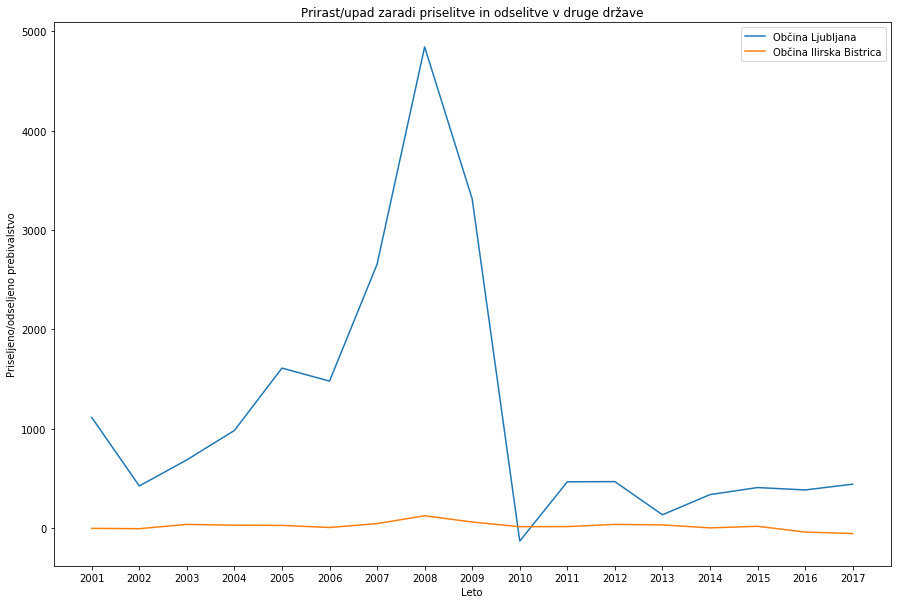

In [39]:
li=[]
vsi=[]
vsi2=[]

reader = DictReader(open('prebivalstvo-SLO.csv', 'rt', encoding='utf-8'))
for row in reader:
    li=[]
    obcina=row["MUNICIPALITIES"]
    obcine.append(obcina)
    if obcina =="Ljubljana" :
        for a in stolpci2:
            if (row[a]=="-"):
                vsi.append(float(0))
            else:
                vsi.append(float(row[a]))
    if obcina =="Ilirska Bistrica":
        for a in stolpci2:
            if (row[a]=="-"):
                vsi2.append(float(0))
            else:
                vsi2.append(float(row[a]))
plt.figure(figsize=(15,10));
plt.plot(leta,vsi,label="Občina Ljubljana")
plt.plot(leta,vsi2,label="Občina Ilirska Bistrica")
plt.xlabel("Leto")
plt.ylabel("Priseljeno/odseljeno prebivalstvo")
plt.title("Prirast/upad zaradi priselitve in odselitve v druge države")
plt.legend()
plt.show()
    